In [319]:
import numpy as np
import csv
import os
from textblob import TextBlob

import pandas as pd
import wordcloud
import matplotlib.pyplot as plt

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.cross_validation import train_test_split,cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
import itertools
import pickle

In [320]:
df1_review = pd.read_csv('C:/Users/hello/Desktop/Project3/resources/amazon_reviews_v1.csv',low_memory=False)
df1_review.head()

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,__label1__,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,__label1__,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,3,__label1__,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...
3,4,__label1__,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...
4,5,__label1__,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...


#### Insert pos_neg column for Sentiment modeling
     Negative reviews:      1-3 Stars  = 0
     Positive reviews:      4-5 Stars  = 1

In [321]:
df1_review['pos_neg'] = [1 if x > 3 else 0 for x in df1_review.RATING]

In [323]:
df_review = df1_review[['pos_neg','REVIEW_TEXT']].copy()
df_review.head(2)

,pos_neg,REVIEW_TEXT
0,1,"When least you think so, this product will sav..."
1,1,Lithium batteries are something new introduced...


In [324]:
# replace NaN values with some value of their own.
df_review.REVIEW_TEXT.fillna(' ').head()

0    When least you think so, this product will sav...
1    Lithium batteries are something new introduced...
2    I purchased this swing for my baby. She is 6 m...
3    I was looking for an inexpensive desk calcolat...
4    I only use it twice a week and the results are...
Name: REVIEW_TEXT, dtype: object

In [325]:
df_review['REVIEW_TEXT'].values.astype('U')

array(['When least you think so, this product will save the day. Just keep it around just in case you need it for something.',
       "Lithium batteries are something new introduced in the market there average developing cost is relatively high but Stallion doesn't compromise on quality and provides us with the best at a low cost.<br />There are so many in built technical assistants that act like a sensor in their particular forté. The battery keeps my phone charged up and it works at every voltage and a high voltage is never risked.",
       "I purchased this swing for my baby. She is 6 months now and has pretty much out grown it. It is very loud and doesn't swing very well. It is beautiful though. I love the colors and it has a lot of settings, but I don't think it was worth the money.",
       ...,
       'I love moccasins  This fit like it was custom made for me.<br />Very soft and comfortable.  Double leather bottom so I will wear it everywhere except when walking on street or sid

In [326]:
df_review['REVIEW_TEXT'].count()

21000

In [327]:
df_review['pos_neg'].value_counts()

1    16183
0     4817
Name: pos_neg, dtype: int64

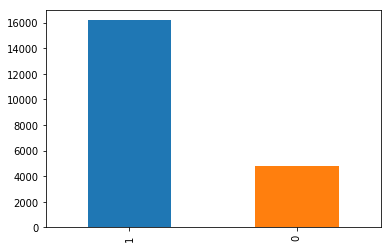

In [328]:
df_review['pos_neg'].value_counts().plot(kind="bar")
plt.show()

In [ ]:
df_review.info()

# Preprocessing

In [330]:
stops = stopwords.words('english')

In [331]:
# TextBlob(message).words will give us collection of words from a sentence.
def split_into_tokens(sentence):
    return TextBlob(sentence).words

df_review.REVIEW_TEXT.head().apply(split_into_tokens)

0    [When, least, you, think, so, this, product, w...
1    [Lithium, batteries, are, something, new, intr...
2    [I, purchased, this, swing, for, my, baby, She...
3    [I, was, looking, for, an, inexpensive, desk, ...
4    [I, only, use, it, twice, a, week, and, the, r...
Name: REVIEW_TEXT, dtype: object

In [332]:
# Lemma is converting words into it's root form. 
def split_into_lemmas(message):
    message = message.lower()
    words = TextBlob(message).words
    return [word.lemma for word in words]

df_review.REVIEW_TEXT.head().apply(split_into_lemmas)

0    [when, least, you, think, so, this, product, w...
1    [lithium, battery, are, something, new, introd...
2    [i, purchased, this, swing, for, my, baby, she...
3    [i, wa, looking, for, an, inexpensive, desk, c...
4    [i, only, use, it, twice, a, week, and, the, r...
Name: REVIEW_TEXT, dtype: object

# Classification/Sentiment Analysis

In [333]:
reviewcloud = wordcloud.WordCloud(background_color='blue', max_font_size=50, 
                                relative_scaling=1).generate(' '.join(str(n)for n in df_review.REVIEW_TEXT))


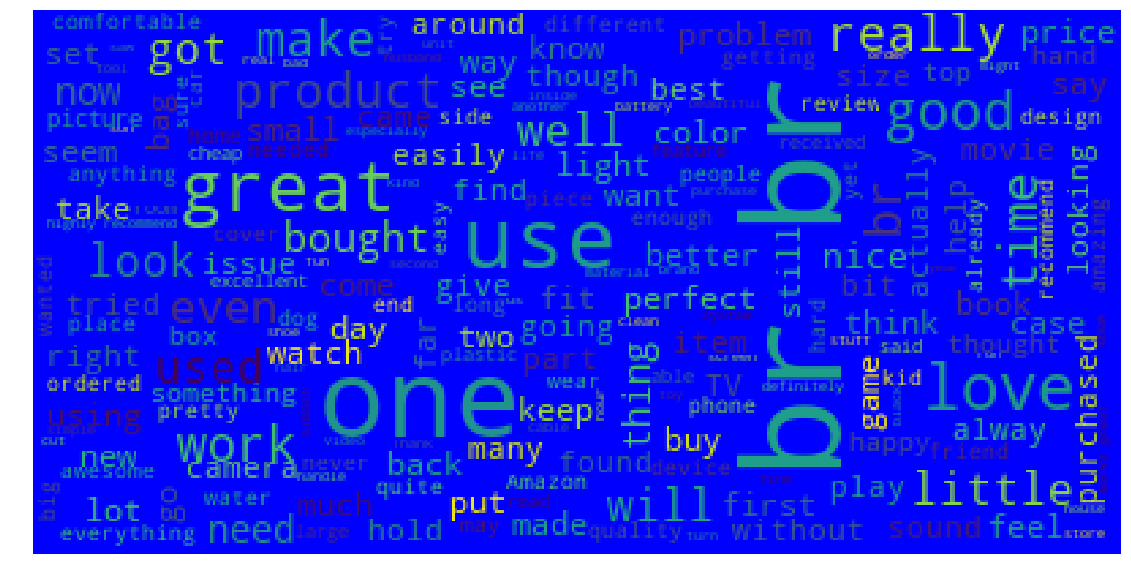

In [334]:
fig = plt.figure(figsize=(20, 10))
plt.axis('off')
plt.imshow(reviewcloud);

# Train/Split
#This bit of code separates the collected data by 80/20 for training and testing. 

In [335]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_review.REVIEW_TEXT, df_review.pos_neg,test_size=0.2, random_state=42)


In [336]:
print("X_train shape: {}".format(X_train.shape), end='\n')
print("y_train shape: {}".format(y_train.shape), end='\n\n')
print("X_test shape: {}".format(X_test.shape), end='\n')
print("y_test shape: {}".format(y_test.shape), end='\n\n')

X_train shape: (16800,)
y_train shape: (16800,)

X_test shape: (4200,)
y_test shape: (4200,)



In [ ]:
# X_test = pd.Series(X_test.flatten())
# X_test

# CountVectorization


In [ ]:
type(X_test)

In [337]:
# list of tokens (lemmas) above is converted into a vector that machine learning model can understand.
vectorizer = CountVectorizer(analyzer=split_into_lemmas, ngram_range=(2,4),
    lowercase = False,)
X_train_vect = vectorizer.fit_transform((X_train).values.astype(str))
print("X_train_vect:\n{}".format(repr(X_train_vect)))

#Pandas astype()methods is used to change data type of a series

X_train_vect:
<16800x32332 sparse matrix of type '<class 'numpy.int64'>'
	with 811195 stored elements in Compressed Sparse Row format>


In [338]:
#vectorizer.vocabulary_
print( len(vectorizer.vocabulary_))
# X_train_vect.toarray()
#Each vector has as many dimensions as there are unique words in the corpus:

32332


# Logistic Regression

In [340]:
feature_names = vectorizer.get_feature_names()
print("Number of features: {}".format(len(feature_names)))


Number of features: 32332


In [341]:
# giving less weightage to frequently occuring words,
# the term weighting and normalization is done with TF-IDF, using scikit-learn's TfidfTransformer:
transformer = TfidfTransformer(smooth_idf=False)
tfidf_X_train = transformer.fit_transform(X_train_vect)

tfidf_X_train

<16800x32332 sparse matrix of type '<class 'numpy.float64'>'
	with 811195 stored elements in Compressed Sparse Row format>

In [342]:
# tfidf_X_train.toarray()
print(tfidf_X_train.shape)
# len(tfidf_X_train.toarray())

(16800, 32332)


In [344]:
scores = cross_val_score(LogisticRegression(), tfidf_X_train, y_train, cv=5)
print("Mean cross-validation accuracy: {:.3f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.848


In [345]:
# Fitting in the model - logistic Regression
logreg = LogisticRegression(C=0.1).fit(X_train_vect, y_train)
logreg

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [346]:
X_test_vect = vectorizer.transform((X_test).values.astype(str))
tfidf_X_test = transformer.transform(X_test_vect)
tfidf_X_test
# print(tfidf_X_test.shape)

<4200x32332 sparse matrix of type '<class 'numpy.float64'>'
	with 197204 stored elements in Compressed Sparse Row format>

In [347]:
# Model logreg is ready to predict on the test data.
log_y_pred = logreg.predict(X_test_vect)

In [348]:
logreg_score = accuracy_score(y_test, log_y_pred)
print("Accuracy:   {:.3f}".format(logreg_score))

Accuracy:   0.865


In [349]:
print("Training set score: {:.3f}".format(logreg.score(tfidf_X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(tfidf_X_test, y_test)))

Training set score: 0.772
Test set score: 0.779


In [350]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
log_cfm = confusion_matrix(y_test, log_y_pred)
print("Confusion matrix:")
print(log_cfm, end='\n\n')
print('-'*15)
print(np.array([['TN', 'FP'],[ 'FN' , 'TP']]))

Confusion matrix:
[[ 543  401]
 [ 164 3092]]

---------------
[['TN' 'FP']
 ['FN' 'TP']]


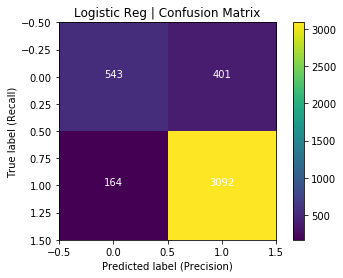

In [351]:
plt.imshow(log_cfm, interpolation='nearest')

for i, j in itertools.product(range(log_cfm.shape[0]), range(log_cfm.shape[1])):
    plt.text(j, i, log_cfm[i, j],
             horizontalalignment="center",
             color="white")

plt.ylabel('True label (Recall)')
plt.xlabel('Predicted label (Precision)')
plt.title('Logistic Reg | Confusion Matrix')
plt.colorbar();

In [352]:
log_f1 = f1_score(y_test, log_y_pred)
print("Logistic Reg - F1 score: {:.3f}".format(log_f1))

Logistic Reg - F1 score: 0.916


In [353]:
print('\n Clasification Report:\n', classification_report(y_test, log_y_pred))


 Clasification Report:
              precision    recall  f1-score   support

          0       0.77      0.58      0.66       944
          1       0.89      0.95      0.92      3256

avg / total       0.86      0.87      0.86      4200



# Multinomial Bayes
on Training data

In [355]:
mnb = MultinomialNB(alpha=.01)
mnb.fit(tfidf_X_train, y_train)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [356]:
mnb_y_pred = mnb.predict(tfidf_X_test)

In [357]:
mnb_score = accuracy_score(y_test, mnb_y_pred)
print("Accuracy:   {:.3f}".format(mnb_score))

Accuracy:   0.811


In [358]:
print("Training set score: {:.3f}".format(mnb.score(tfidf_X_train, y_train)))
print("Test set score: {:.3f}".format(mnb.score(tfidf_X_test, y_test)))

Training set score: 0.931
Test set score: 0.811


In [359]:
mnb_cfm = confusion_matrix(y_test, mnb_y_pred)
print("Confusion matrix:")
print(mnb_cfm, end='\n\n')
print('-'*15)
print(np.array([['TN', 'FP'],[ 'FN' , 'TP']]))

Confusion matrix:
[[ 220  724]
 [  69 3187]]

---------------
[['TN' 'FP']
 ['FN' 'TP']]


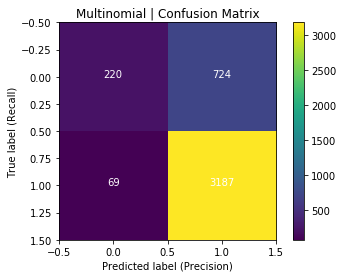

In [360]:
plt.imshow(mnb_cfm, interpolation='nearest')

for i, j in itertools.product(range(mnb_cfm.shape[0]), range(mnb_cfm.shape[1])):
    plt.text(j, i, mnb_cfm[i, j],
             horizontalalignment="center",
             color="white")

plt.ylabel('True label (Recall)')
plt.xlabel('Predicted label (Precision)')
plt.title('Multinomial | Confusion Matrix')
plt.colorbar();

In [362]:
mnb_f1 = f1_score(y_test, mnb_y_pred)
print("Multinomial NB - F1 score: {:.3f}".format(mnb_f1))

Multinomial NB - F1 score: 0.889


In [363]:
pkl_filename = "pickle_model.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(logreg, file)

# Sentiment Analysis using TextBlob

In [364]:
df_review.to_csv("reviewtext.csv", sep=",", index=None)

In [365]:
correct = 0
count = 0
with open(infile, encoding="utf8",mode = 'r') as file:
    for line in file.read().split('\n'):
            analysis = TextBlob(line)
            if analysis.sentiment.polarity <=0.7:
                correct +=1
            count +=1    
print("Accuracy = {}% via {} samples".format(correct/count*100,count))     

Accuracy = 97.34311017998286% via 21002 samples


In [ ]:
infile = "reviewtext.csv"
from textblob.sentiments import NaiveBayesAnalyzer
n_list = list()
p_list = list()
c_list = list()
with open(infile, 'r') as csvfile:
    rows = csv.reader(csvfile)
    for row in rows:
        sentence = row[1]
        blob = TextBlob(sentence,analyzer=NaiveBayesAnalyzer() )
        each_sentiment = blob.sentiment
#         n_list.append(each_sentiment.p_neg)
#         p_list.append(each_sentiment.p_pos)
#         c_list.append(each_sentiment.classification)
#         d = dict()
#         d['classification']=c_list
#         d['p_pos']=p_list
#         d['p_neg']=n_list
        print(each_sentiment)
#  d = pd.DataFrame(d)      

# Summary

Logistic Regression and Naives Bayes are two popular Classification models.
Here Log Regression wins with a slightly higher accuracy score.
Texlblob is a python library for processing textual data.

In [369]:
from textblob.sentiments import NaiveBayesAnalyzer
blob = TextBlob("I have had my camera for about 2 weeks now. The pictures are great,it is so easy to use. I love it!!", analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='pos', p_pos=0.8400716235579158, p_neg=0.15992837644208388)